# Задание 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
HR = pd.read_csv('D:\Обучение\Аналитика данных\Диплом\HR.csv')
HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Задание 2

In [3]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
HR.median()

C:\Users\Serge\AppData\Local\Temp/ipykernel_3696/2791647558.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  HR.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

# Задание 3

In [5]:
import seaborn as sns

<AxesSubplot:>

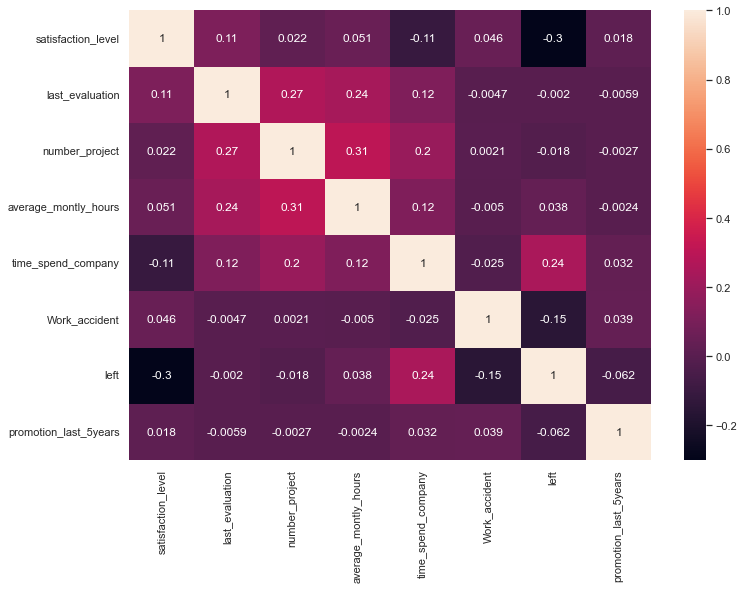

In [6]:
sns.set(rc = {'figure.figsize': (11.7, 8.27)})
sns.heatmap(HR.corr(method='kendall'), annot=True)

Судя по матрице корреляции наиболее скоррелированными парами переменных являются:
1) average_montly_hours / number_project
2) satisfaction_level / left

Судя по матрице корреляции наименее скоррелированными парами переменных являются:
1) last_evaluation / left
2) Work_accident / number_project

# Задание 4

In [7]:
HR['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# Задание 5

In [8]:
HR['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

# Задание 6

In [9]:
HR.groupby('department')['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

# Задание 7

Задача: проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


H0: затраченное время на рабочем месте сотрудников с высоким окладом равно времени сотрудников с низким окладом

H1: затраченное время на рабочем месте сотрудников с высоким окладом больше времени соттрудников с низким окладом

In [10]:
from scipy.stats import f_oneway 
import scipy.stats as stats
alpha = 0.05

f, p = f_oneway(HR[HR['salary'] == 'low']['average_montly_hours'], HR[HR['salary'] == 'high']['average_montly_hours'])

print(p)
print(HR[HR['salary'] == 'low']['average_montly_hours'].mean())
print(HR[HR['salary'] == 'high']['average_montly_hours'].mean())

if (p < alpha):
    print('Отвергаем нулевую гипотезу. Кто больше работает, тот больше получает')
else:
    print('Не отвергаем нулевую гипотезу. Уровень оклада не зависит от времени проведенном на рабочем месте')

0.46610234782779036
200.9965828321487
199.86742118027485
Не отвергаем нулевую гипотезу. Уровень оклада не зависит от времени проведенном на рабочем месте


# Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [11]:
# Доля неуволившихся сотрудников с повышением за последние 5 лет
not_resigned_raising_count = len(HR.loc[(HR.left == 0) & (HR.promotion_last_5years == 1)])
not_resigned_no_raising_count = len(HR.loc[(HR.left == 0) & (HR.promotion_last_5years == 0)])

not_resigned_raising_fraction = round(not_resigned_raising_count / not_resigned_no_raising_count * 100, 2)
print(f'Доля неуволившихся сотрудников с повышением за последние 5 лет: {not_resigned_raising_fraction} %')

# Доля уволившихся сотрудников с повышением за последние 5 лет
resigned_raising_count = len(HR.loc[(HR.left == 1) & (HR.promotion_last_5years == 1)])
resigned_no_raising_count = len(HR.loc[(HR.left == 1) & (HR.promotion_last_5years == 0)])

resigned_raising_fraction = round(resigned_raising_count / resigned_no_raising_count * 100, 2)
print(f'Доля уволившихся сотрудников с повышением за последние 5 лет: {resigned_raising_fraction} %')

Доля неуволившихся сотрудников с повышением за последние 5 лет: 2.7 %
Доля уволившихся сотрудников с повышением за последние 5 лет: 0.53 %


In [12]:
not_resigned_satisfaction = HR[HR['left'] == 0]['satisfaction_level'].mean()
resigned_satisfaction = HR[HR['left'] == 1]['satisfaction_level'].mean()

print(f'Средняя степень удовлетворенности неуволившихся сотрудников: {round(not_resigned_satisfaction, 2)}')
print(f'Средняя степень удовлетворенности уволившихся сотрудников: {round(resigned_satisfaction, 2)}')

Средняя степень удовлетворенности неуволившихся сотрудников: 0.67
Средняя степень удовлетворенности уволившихся сотрудников: 0.44


In [13]:
not_resigned_number_project = HR[HR['left'] == 0]['number_project'].mean()
resigned_number_project = HR[HR['left'] == 1]['number_project'].mean()

print(f'Среднее количество проектов неуволившихся сотрудников: {round(not_resigned_number_project, 2)}')
print(f'Среднее количество проектов уволившихся сотрудников: {round(resigned_number_project, 2)}')

Среднее количество проектов неуволившихся сотрудников: 3.79
Среднее количество проектов уволившихся сотрудников: 3.86


# Задание 9

Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [14]:
import matplotlib.pyplot as plt
from matplotlib import colors

In [57]:
# Подготовка DataFrame для значения X LDA
factors_X = HR.copy()
factors_X = factors_X.drop(['department', 'salary', 'left'], axis=1)
factors_X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [45]:
factors_X.shape

(14999, 7)

In [46]:
# Подготовка DataFrame для значения Y LDA
factors_Y = HR['left']
factors_Y = factors_Y.reset_index()
factors_Y = factors_Y.drop(['index'], axis=1)
factors_Y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [47]:
factors_Y.shape

(14999, 1)

In [48]:
factors_Y = factors_Y['left'].values.tolist()

In [49]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(factors_X, factors_Y, test_size=0.30)

In [50]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
lda = LinearDiscriminantAnalysis()

In [52]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [53]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
...,...,...
4495,0,0
4496,0,0
4497,0,0
4498,0,0


In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, lda.predict(X_test))

0.7748888888888888